In [3]:
import pandas as pd




In [4]:
df = pd.read_excel(r"C:\Users\raund\Downloads\QVI_transaction_data (1).xlsx")

In [5]:
df.isnull().sum()
df.isnull().sum().sum()
(df.isnull().mean() * 100).round(2)



DATE              0.0
STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_NAME         0.0
PROD_QTY          0.0
TOT_SALES         0.0
dtype: float64

In [6]:
df = df.dropna(thresh=int(0.5 * len(df)), axis=1)


In [7]:
df = df.dropna()


In [8]:
df.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


NameError: name 'kf' is not defined

In [10]:

df.duplicated().sum()


1

In [11]:
df[df.duplicated()]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [12]:
df = df.drop_duplicates()


In [13]:
df = df.reset_index(drop=True)


In [14]:
df.duplicated().sum()

0

In [15]:
df.dtypes



DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [16]:
df.describe()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


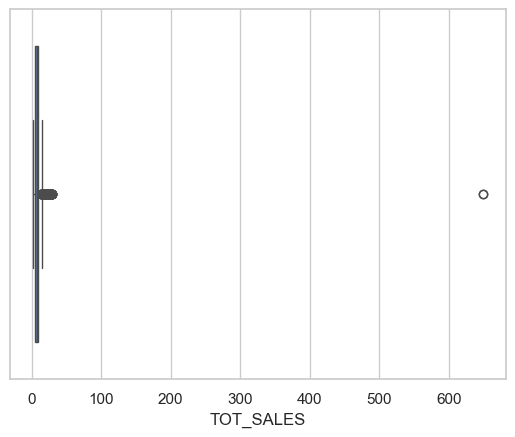

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['TOT_SALES'])  # or any numeric column
plt.show()


In [18]:
Q1 = df['TOT_SALES'].quantile(0.25)
Q3 = df['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['TOT_SALES'] >= lower_bound) & (df['TOT_SALES'] <= upper_bound)]


In [19]:
df.columns
df.dtypes



DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [20]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


In [21]:
df['DATE'].head()
df.dtypes


DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [22]:

df['DATE'].head()
df.dtypes


DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [23]:
# For PROD_QTY
Q1 = df['PROD_QTY'].quantile(0.25)
Q3 = df['PROD_QTY'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['PROD_QTY'] >= lower) & (df['PROD_QTY'] <= upper)]

# Repeat for TOT_SALES
Q1 = df['TOT_SALES'].quantile(0.25)
Q3 = df['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['TOT_SALES'] >= lower) & (df['TOT_SALES'] <= upper)]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['PROD_QTY_scaled', 'TOT_SALES_scaled']] = scaler.fit_transform(df[['PROD_QTY', 'TOT_SALES']])


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['PROD_QTY_norm', 'TOT_SALES_norm']] = scaler.fit_transform(df[['PROD_QTY', 'TOT_SALES']])


In [26]:
df['PROD_NAME'].value_counts().head(10)


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3004
Cobs Popd Sea Salt  Chips 110g              2979
Kettle Tortilla ChpsHny&Jlpno Chili 150g    2961
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    2950
Tostitos Splash Of  Lime 175g               2936
Infuzions Thai SweetChili PotatoMix 110g    2934
Tyrrells Crisps     Ched & Chives 165g      2926
Kettle 135g Swt Pot Sea Salt                2923
Thins Potato Chips  Hot & Spicy 175g        2918
Doritos Corn Chips  Cheese Supreme 170g     2910
Name: count, dtype: int64

In [27]:
df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10)


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      6008
Cobs Popd Sea Salt  Chips 110g              5958
Kettle Tortilla ChpsHny&Jlpno Chili 150g    5922
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    5900
Tostitos Splash Of  Lime 175g               5872
Infuzions Thai SweetChili PotatoMix 110g    5868
Tyrrells Crisps     Ched & Chives 165g      5852
Kettle 135g Swt Pot Sea Salt                5846
Thins Potato Chips  Hot & Spicy 175g        5836
Doritos Corn Chips  Cheese Supreme 170g     5820
Name: PROD_QTY, dtype: int64

In [28]:
df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)


PROD_NAME
Dorito Corn Chp     Supreme 380g            37232.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      33901.4
Smiths Crinkle Chips Salt & Vinegar 330g    32809.2
Kettle Mozzarella   Basil & Pesto 175g      32443.2
Smiths Crinkle      Original 330g           32398.8
Cheezels Cheese 330g                        32045.4
Doritos Cheese      Supreme 330g            31441.2
Kettle Sweet Chilli And Sour Cream 175g     31158.0
Kettle Sea Salt     And Vinegar 175g        30682.8
Kettle Honey Soy    Chicken 175g            30682.8
Name: TOT_SALES, dtype: float64

In [29]:
df['LYLTY_CARD_NBR'].nunique()


62852

In [30]:
df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)


LYLTY_CARD_NBR
259009    127.2
162039    126.8
58361     124.8
230078    123.8
94185     122.8
179228    120.8
130090    119.4
199157    118.8
116181    117.6
114163    117.4
Name: TOT_SALES, dtype: float64

In [31]:
df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)


STORE_NBR
226    17116.8
88     16022.9
165    15449.2
40     15275.4
237    15204.2
58     14961.8
199    14473.5
4      14395.6
26     14234.2
203    14218.2
Name: TOT_SALES, dtype: float64

In [32]:
df['STORE_NBR'].value_counts().head(10)


STORE_NBR
226    1942
88     1823
93     1776
165    1740
237    1720
40     1717
213    1705
43     1700
58     1697
230    1695
Name: count, dtype: int64

<Axes: title={'center': 'Sales Over Time'}, xlabel='DATE'>

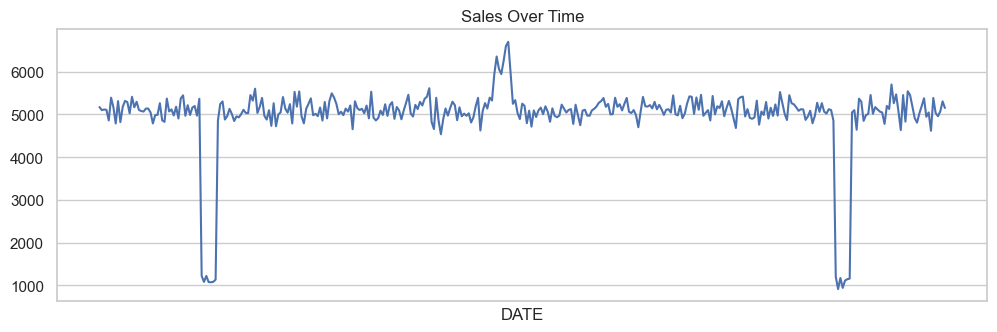

In [33]:
df.groupby('DATE')['TOT_SALES'].sum().plot(figsize=(12, 4), title='Sales Over Time')


<Axes: title={'center': 'Transaction Count Over Time'}, xlabel='DATE'>

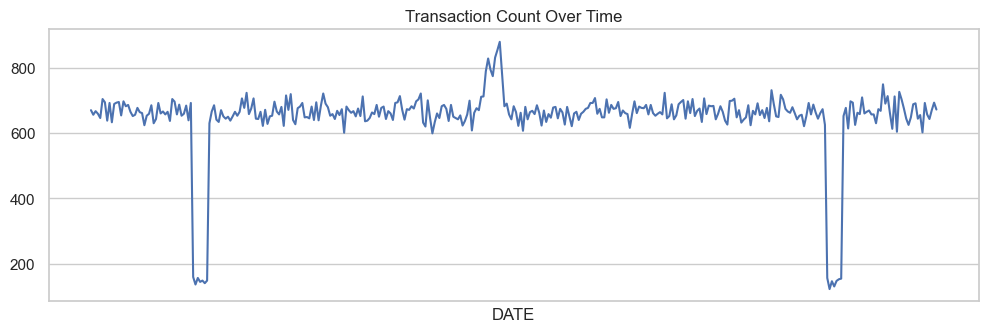

In [34]:
df.groupby('DATE').size().plot(figsize=(12, 4), title='Transaction Count Over Time')


<Axes: ylabel='PROD_NAME'>

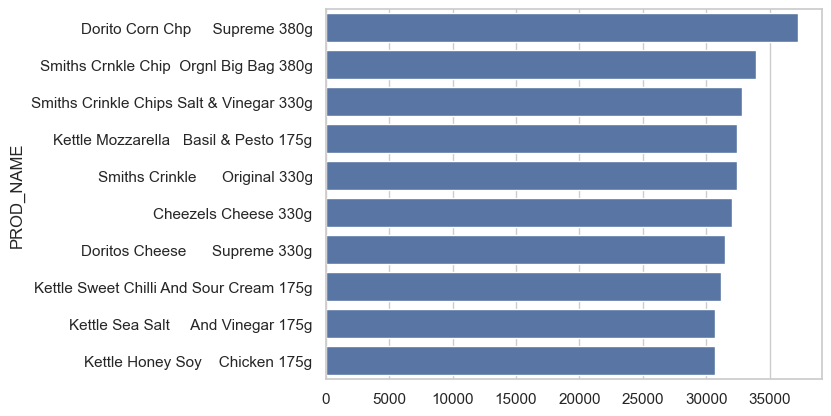

In [35]:
import seaborn as sns
top_products = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)


<Axes: >

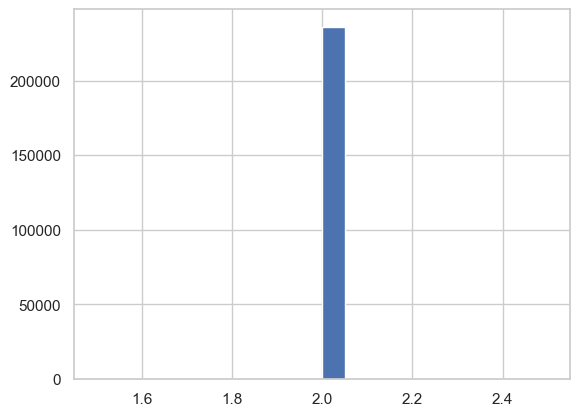

In [36]:
df['PROD_QTY'].hist(bins=20)


In [37]:
kf = pd.read_csv(r"C:\Users\raund\Downloads\QVI_purchase_behaviour (1).csv")

In [38]:
df_merged = pd.merge(kf, df, on='LYLTY_CARD_NBR', how='inner')


In [39]:
df_merged.to_csv("merged_cleaned_data.csv", index=False)


In [40]:
df_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_QTY_scaled,TOT_SALES_scaled,PROD_QTY_norm,TOT_SALES_norm
0,1000,YOUNG SINGLES/COUPLES,Premium,1970-01-01 00:00:00.000043390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,0.0,-0.756263,0.0,0.320388
1,1010,YOUNG SINGLES/COUPLES,Mainstream,1970-01-01 00:00:00.000043352,1,10,51,Doritos Mexicana 170g,2,8.8,0.0,0.507371,0.0,0.592233
2,1011,OLDER SINGLES/COUPLES,Mainstream,1970-01-01 00:00:00.000043310,1,12,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,0.0,-0.666004,0.0,0.339806
3,1013,RETIREES,Budget,1970-01-01 00:00:00.000043531,1,19,91,CCs Tasty Cheese 175g,2,4.2,0.0,-1.568600,0.0,0.145631
4,1025,YOUNG FAMILIES,Budget,1970-01-01 00:00:00.000043425,1,32,69,Smiths Chip Thinly S/Cream&Onion 175g,2,6.0,0.0,-0.756263,0.0,0.320388


 Total Sales by LIFESTAGE & PREMIUM_CUSTOMER

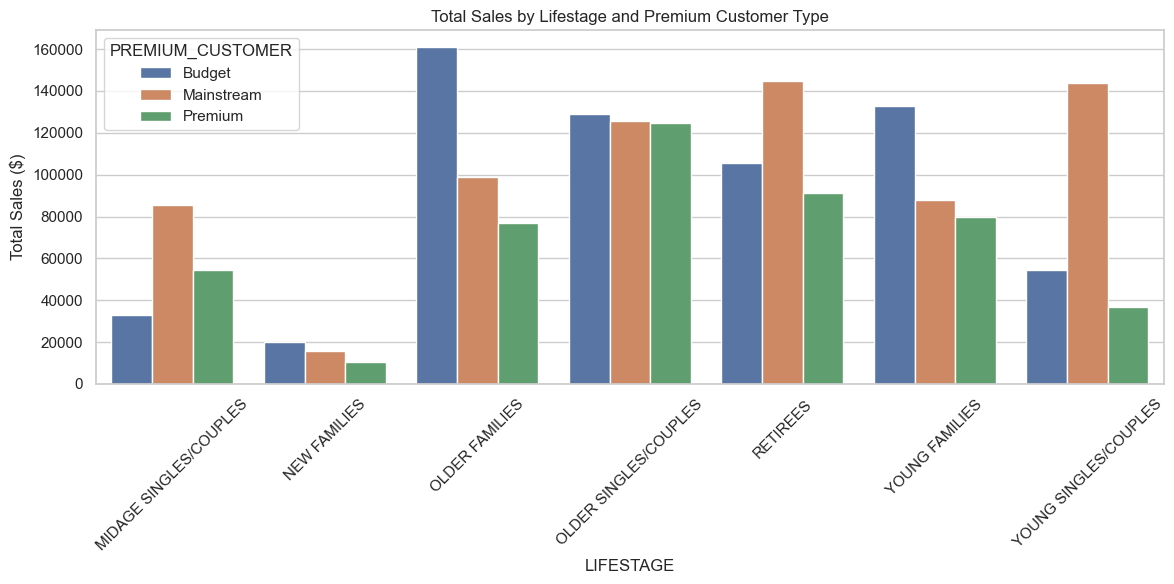

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and aggregate total sales
sales_segment = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Plot total sales
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Lifestage and Premium Customer Type')
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


2. Number of Customers per Segment

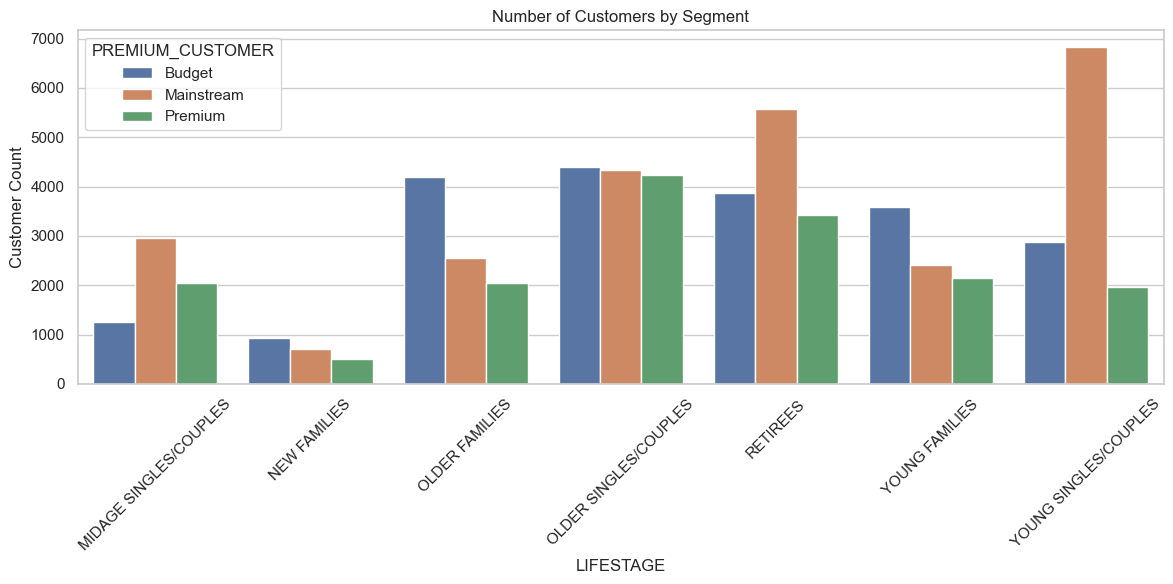

In [42]:
# Count unique customers by segment
customer_counts = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='Customer Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_counts, x='LIFESTAGE', y='Customer Count', hue='PREMIUM_CUSTOMER')
plt.title('Number of Customers by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Average Units per Customer



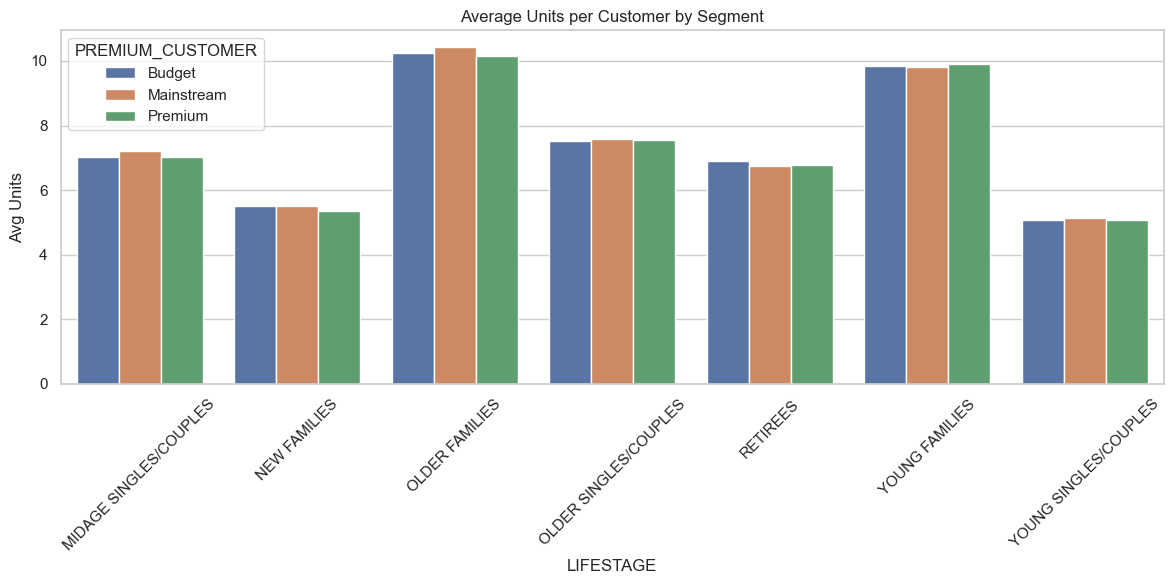

In [43]:
# Group by customer and segment to get total quantity
units_per_customer = df_merged.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Then average per segment
avg_units = units_per_customer.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index(name='Avg Units')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='Avg Units', hue='PREMIUM_CUSTOMER')
plt.title('Average Units per Customer by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Average Price per Unit by Segment

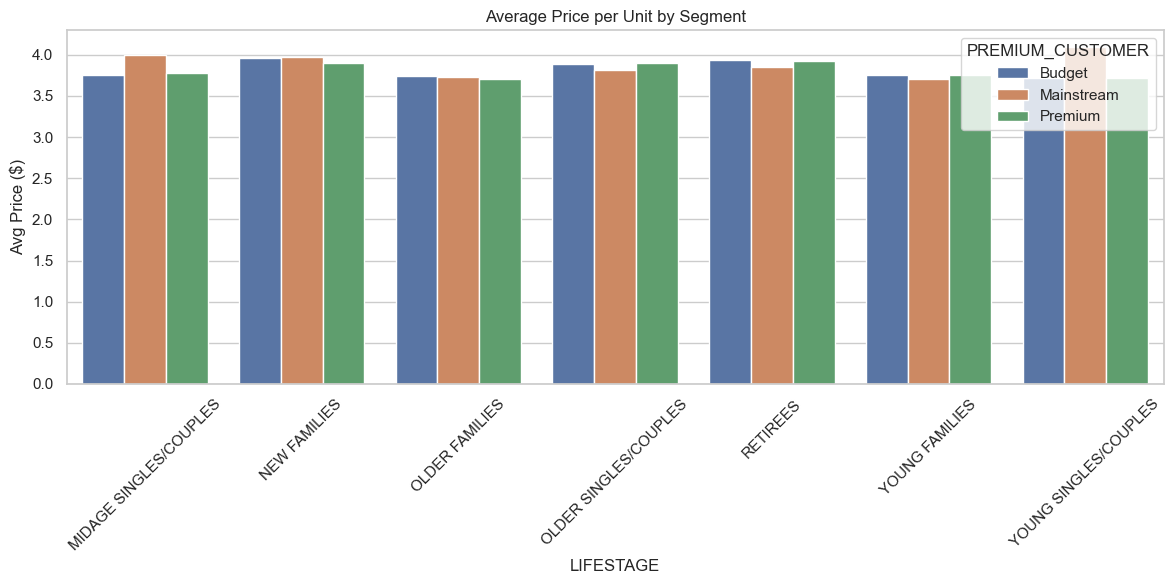

In [44]:
# Calculate price per unit
df_merged['PRICE_PER_UNIT'] = df_merged['TOT_SALES'] / df_merged['PROD_QTY']

# Group by segment and average
avg_price =df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by Segment')
plt.xticks(rotation=45)
plt.ylabel('Avg Price ($)')
plt.tight_layout()
plt.show()


5. T-Test Between Segments

In [45]:
from scipy.stats import ttest_ind

# Define groups
mainstream = df_merged[
    (df_merged['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (df_merged['LIFESTAGE'].str.contains('SINGLES|COUPLES'))
]['PRICE_PER_UNIT']

budget_premium = df_merged[
    (df_merged['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])) &
    (df_merged['LIFESTAGE'].str.contains('SINGLES|COUPLES'))
]['PRICE_PER_UNIT']

# Perform t-test
t_stat, p_val = ttest_ind(mainstream, budget_premium, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")


T-statistic: 20.316, P-value: 0.0000


6. Deep Dive: Brand & Pack Size Preference for Target Segment

C:\Users\raund\AppData\Local\Temp\ipykernel_12284\3973861894.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')


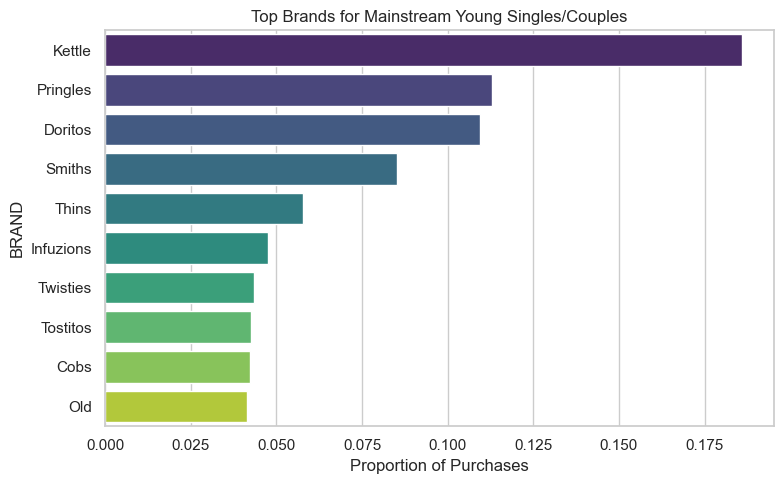

C:\Users\raund\AppData\Local\Temp\ipykernel_12284\3973861894.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pack_counts.index.astype(int).astype(str), y=pack_counts.values, palette='coolwarm')


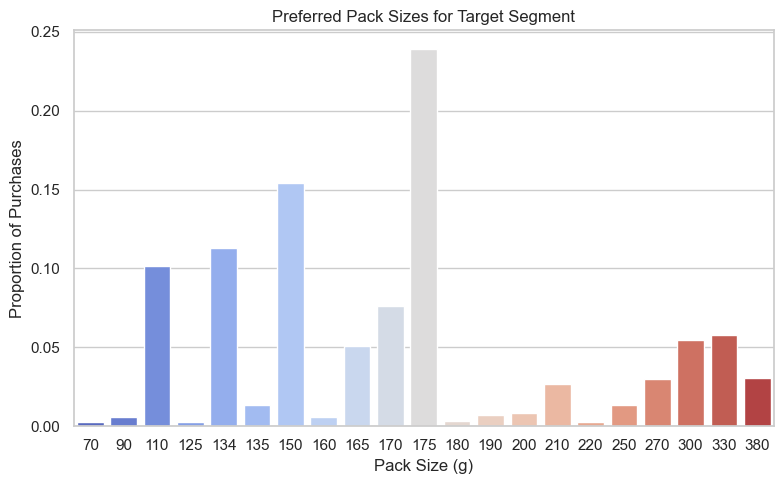

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# 1. Create BRAND column if not exists
if 'BRAND' not in df_merged.columns:
    df_merged['BRAND'] = df_merged['PROD_NAME'].str.split().str[0]
    df_merged['BRAND'] = df_merged['BRAND'].replace({
        'RRD': 'RedRockDeli',
        'RED': 'RedRockDeli',
        'SWW': 'Smiths',
        'SMI': 'Smiths',
        'NCC': 'Natural',
        'ETA': 'ETA'
        # Add more mappings as needed
    })

# 2. Create PACK_SIZE column if not exists
if 'PACK_SIZE' not in df_merged.columns:
    df_merged['PACK_SIZE'] = df_merged['PROD_NAME'].str.extract(r'(\d+)').astype(float)

# 3. Filter target group
target_group = df_merged[
    (df_merged['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
]

# 4. Brand preference
brand_counts = target_group['BRAND'].value_counts(normalize=True).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.title('Top Brands for Mainstream Young Singles/Couples')
plt.xlabel('Proportion of Purchases')
plt.tight_layout()
plt.show()

# 5. Pack size preference
pack_counts = target_group['PACK_SIZE'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=pack_counts.index.astype(int).astype(str), y=pack_counts.values, palette='coolwarm')
plt.title('Preferred Pack Sizes for Target Segment')
plt.xlabel('Pack Size (g)')
plt.ylabel('Proportion of Purchases')
plt.tight_layout()
plt.show()


Perfect, Om. Let’s wrap this up like a real **data consultant for Julia, the Category Manager**. Here's a polished, **data-driven recommendation slide** based on the insights you've developed.

---

## 🧠 **Final Recommendation: Strategy for Chips Category**

### 🧾 Summary of Insights:

* 🧍 **Customer Segment Focus**:

  * **Mainstream Young Singles/Couples** and **Budget Older Families** are the highest contributors to sales.
  * These segments **buy more units per person**, not just because of population size.

* 💰 **Spending Behavior**:

  * **Mainstream buyers** spend slightly more **per packet**, suggesting lower price sensitivity.
  * **Budget shoppers** respond to quantity but seek **value packs**.

* 🛍️ **Brand Preferences** (Mainstream Young Singles/Couples):

  * Prefer leading brands like **Smiths**, **Doritos**, **Thins**, and **Red Rock Deli**.
  * Show **brand loyalty** toward recognizable, fun/snack-friendly names.

* 📦 **Pack Size Preferences**:

  * Popular pack sizes: **175g** and **220g**
  * These sizes strike a balance between **single-occasion indulgence** and **value for sharing**

---

## 💡 Strategic Recommendations:

| Area                        | Recommendation                                                                                                                                                                           |
| --------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 🎯 **Target Segments**      | Focus on **Mainstream Young Singles/Couples** and **Budget Older Families**. High volume and brand engagement make them ideal.                                                           |
| 🛍️ **Product Strategy**    | Promote **175g–220g** packs. These are top sellers and resonate with core segments. Consider bundling or pricing incentives for bulk purchase.                                           |
| 📣 **Promotional Strategy** | For **Mainstream** segments, highlight brand value and experience (e.g., "Party snack", "Game-night must-have"). For **Budget** segments, offer **multi-buy discounts** or combo offers. |
| 🧠 **Brand Placement**      | Ensure visibility for top brands (**Smiths**, **Doritos**, **Red Rock Deli**) in promotions and in-store displays.                                                                       |
| 📈 **Next Steps**           | Consider analyzing **repeat purchases**, **loyalty redemption**, or cross-category bundling (chips + soda, etc.) for more targeted campaigns.                                            |

---

### ✨ One-liner Pitch to Julia:

> “By doubling down on 175g–220g packs of brands like Smiths and Doritos and targeting Mainstream Young Singles/Couples and Budget Families, we can drive both unit sales and brand loyalty — right where the market is already warm.”

---




In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

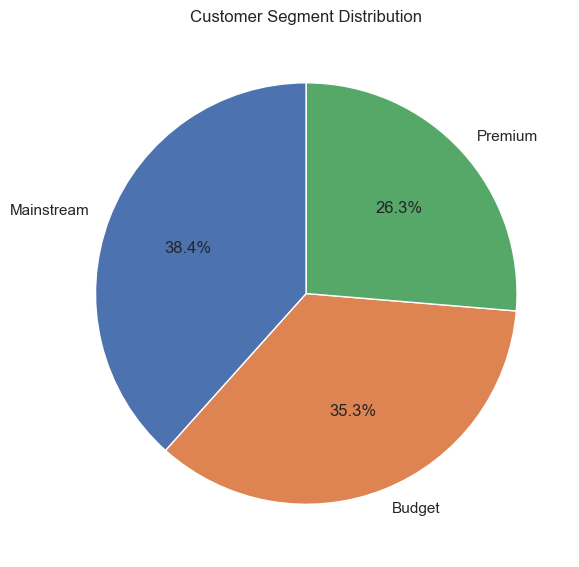

In [52]:
segment_counts =  df_merged['PREMIUM_CUSTOMER'].value_counts()

segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Customer Segment Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


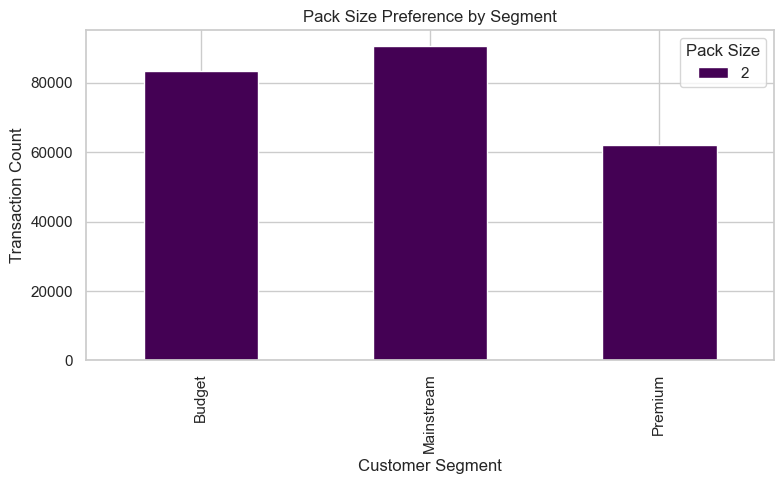

In [53]:
pack_pref = df_merged.groupby(['PREMIUM_CUSTOMER', 'PROD_QTY']).size().unstack().fillna(0)

pack_pref.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Pack Size Preference by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Transaction Count')
plt.legend(title='Pack Size')
plt.tight_layout()
plt.show()


In [59]:
df_merged['brand'] = df_merged['PROD_NAME'].str.split().str[0]


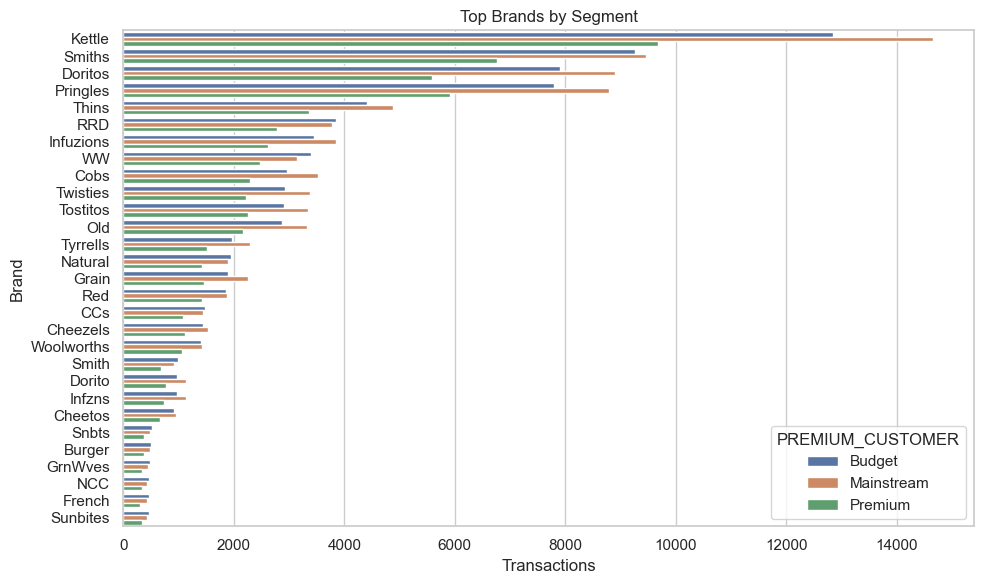

In [60]:
top_brands = df_merged.groupby(['PREMIUM_CUSTOMER', 'brand']).size().reset_index(name='count')
top_brands = top_brands.sort_values(['PREMIUM_CUSTOMER', 'count'], ascending=[True, False])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_brands, x='count', y='brand', hue='PREMIUM_CUSTOMER')
plt.title('Top Brands by Segment')
plt.xlabel('Transactions')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()
